In [266]:
import pandas as pd
from error_config import error_map

In [267]:
df_transformer = pd.read_csv('/home/sanjana/factual_evaluation_source_based/datasets/sota_annotations/dialogue_aggrefact.csv')

df_llm = pd.read_csv('/home/sanjana/factual_evaluation_source_based/datasets/llm_annotations/sample/sample_annotations_sanjana.csv')
df_llm = df_llm.sort_values('uuid').drop_duplicates(['docid'], keep='last')

len(df_llm)



172

1182


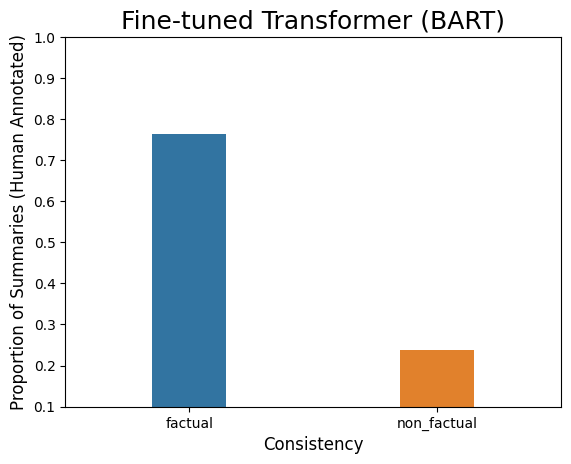

In [268]:
import seaborn as sns 
from matplotlib import pyplot as plt

df_error_count = {'Consistency': ['factual', 'non_factual'],
'Proportion of Summaries' : [len(df_transformer[df_transformer['w/ Error'] == 0])/len(df_transformer), len(df_transformer[df_transformer['w/ Error'] == 1])/len(df_transformer)]}
print(len(df_transformer[df_transformer['w/ Error'] == 0]))
df_error_count = pd.DataFrame(df_error_count)
ax = sns.barplot(df_error_count, x = 'Consistency', y = 'Proportion of Summaries', width = 0.3)

ax.set_xlabel( "Consistency" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Fine-tuned Transformer (BART)" , size = 18 )
  


plt.ylim(0.1, 1.0)
plt.show()


141


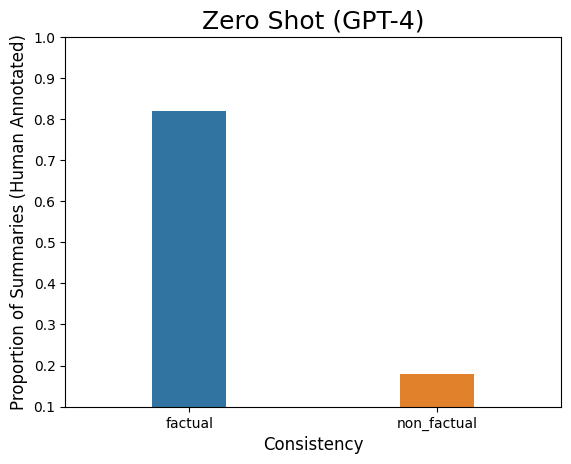

In [269]:
import seaborn as sns 
import seaborn as sns 
from matplotlib import pyplot as plt

df_error_count = {'Consistency': ['factual', 'non_factual'],
'Proportion of Summaries' : [len(df_llm[df_llm['error_type'].isnull()])/len(df_llm), len(df_llm[~df_llm['error_type'].isnull()])/len(df_llm)]}
print(len(df_llm[df_llm['error_type'].isnull()]))

df_error_count = pd.DataFrame(df_error_count)
ax = sns.barplot(df_error_count, x = 'Consistency', y = 'Proportion of Summaries', width = 0.3)
ax.set_xlabel( "Consistency" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Zero Shot (GPT-4)" , size = 18 )
plt.ylim(0.1, 1.0)
plt.show()


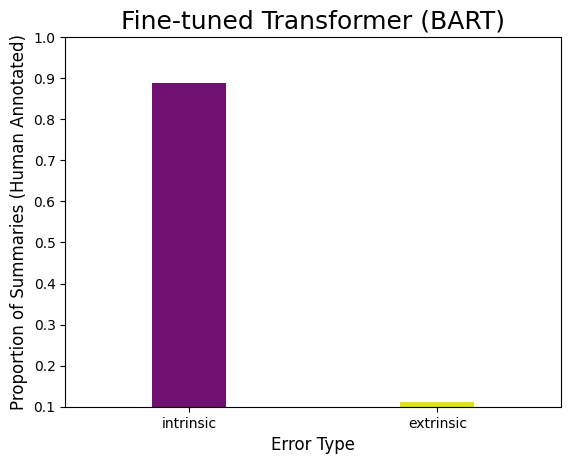

In [271]:
num_errors = len(df_transformer[df_transformer['w/ Error'] == 1])
num_ext_errors = len(df_transformer[df_transformer['OutE'] == 1])
num_oth_errors = len(df_transformer[df_transformer['OtherE'] == 1])
num_int_errors = num_errors - (num_ext_errors)
df_error_count = {'error_type': ['intrinsic', 'extrinsic'],
                  'count' : [num_int_errors/num_errors, num_ext_errors/num_errors]}
df_error_count = pd.DataFrame(df_error_count)

color = ['purple', 'yellow']
ax = sns.barplot(df_error_count, x = 'error_type', y = 'count', width = 0.3, palette=color)

ax.set_xlabel( "Error Type" , size = 12 )
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Fine-tuned Transformer (BART)" , size = 18 )
plt.ylim(0.1, 1.0)
plt.show()

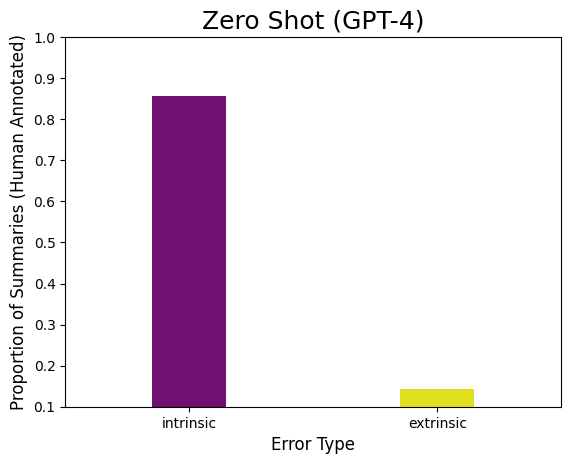

In [212]:
num_intrinsic = len(df_llm[df_llm['error_type'] == 'Intrinsic_Error'])
num_extrinsic = len(df_llm[df_llm['error_type'] == 'Extrinsic_Error'])
num_errors = len(df_llm[~df_llm['error_type'].isnull()])

df_error_count = {'error_type': ['intrinsic', 'extrinsic'],
                  'count' : [num_intrinsic/num_errors, num_extrinsic/num_errors]}
df_error_count = pd.DataFrame(df_error_count)
color = ['purple', 'yellow']
ax = sns.barplot(df_error_count, x = 'error_type', y = 'count', width = 0.3, palette=color)

ax.set_xlabel( "Error Type" , size = 12 )
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Zero Shot (GPT-4)" , size = 18 )
plt.ylim(0.1, 1.0)
plt.show()

In [213]:
error_categories = list(set(list(error_map.values()) + list(df_llm_error_categories['error_category'].values)))



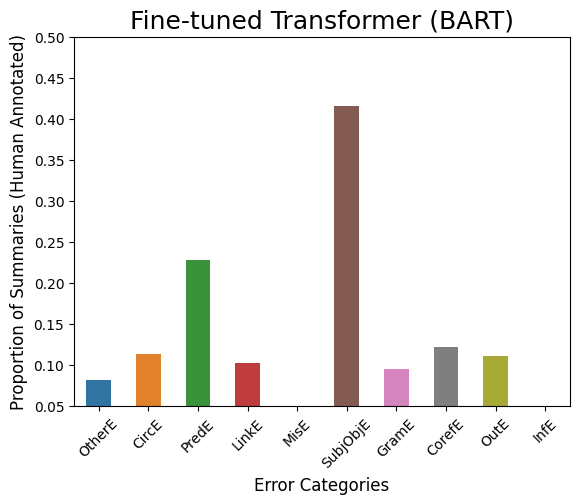

In [264]:
########### Error categories ################

df_error_stats = {'error_category': [],
                 'count': []}
for err_type in error_categories:
    df_error_stats['error_category'] += [err_type]
    if err_type in df_transformer:
        df_error_stats['count'] += [len(df_transformer[df_transformer[err_type] == 1])/ len(df_transformer[df_transformer['w/ Error'] == 1])]
    else:
        df_error_stats['count']  += [0]
        # err_type_len =list(df[err_type].values)
df_error_stats = pd.DataFrame(df_error_stats)
df_error_stats
ax = sns.barplot(df_error_stats, x = 'error_category', y = 'count', width = 0.5)
ax.set_xlabel( "Error Categories" , size = 12 )
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Fine-tuned Transformer (BART)" , size = 18 )
plt.ylim(0.05, 0.5)
plt.xticks(rotation=45)
plt.show()

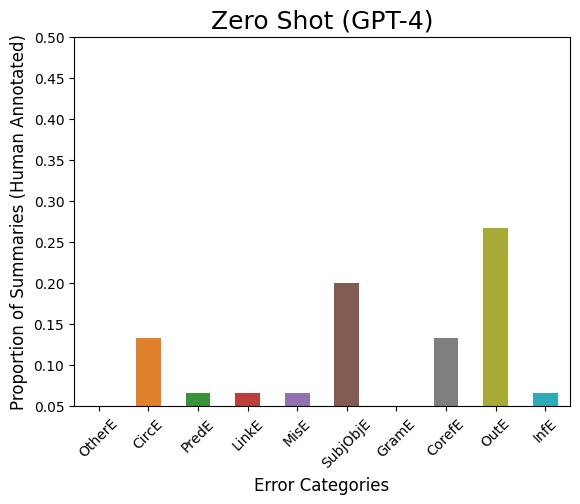

In [265]:
df_llm_error_categories = pd.read_csv('/home/sanjana/factual_evaluation_source_based/experiments/notebooks/sample_llm_annotated.csv')

df_error_stats = {'error_category': [],
                 'count': []}


for err_type in error_categories:
    df_error_stats['error_category'] += [err_type]
    df_error_stats['count'] += [len(df_llm_error_categories[df_llm_error_categories['error_category'] == err_type])/ len(df_llm_error_categories)]
    # err_type_len =list(df[err_type].values)
df_error_stats = pd.DataFrame(df_error_stats)
# df_error_stats
ax = sns.barplot(df_error_stats, x = 'error_category', y = 'count', width = 0.5)

ax.set_xlabel( "Error Categories" , size = 12 )
ax.set_ylabel( "Proportion of Summaries (Human Annotated)" , size = 12 )
  
# Set title for plot
ax.set_title( "Zero Shot (GPT-4)" , size = 18 )
plt.ylim(0.05, 0.5)
plt.xticks(rotation=45)
plt.show()


In [218]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn import metrics

def get_f1(y_true, y_pred):
    f1_score_macro = f1_score(y_true, y_pred, average='macro')
    # f1_score_mcro = f1_score(y_true, y_pred, average='macro')
    return f1_score_macro

def get_auc(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
    return metrics.auc(fpr, tpr)

In [237]:
from summac.model_summac import SummaCZS, SummaCConv
from questeval.questeval_metric import QuestEval
questeval = QuestEval(no_cuda=True)

model_zs = SummaCZS(granularity="sentence", model_name="vitc", device="cuda") # If you have a GPU: switch to: device="cuda"
model_conv = SummaCConv(models=["vitc"], bins='percentile', granularity="sentence", nli_labels="e", device="cuda", start_file="default", agg="mean")

def get_summac_scores(df):
    dialogues = df['dialogue'].values
    summaries = df['summary'].values
    score_zs1 = model_zs.score(dialogues, summaries)
    score_conv1 = model_conv.score(dialogues, summaries)
    print("[Summary 1] SummaCZS Score: %.3f; SummacConv score: %.3f" % (score_zs1["scores"][0], score_conv1["scores"][0])) # [Summary 1] SummaCZS Score: 0.582; SummacConv score: 0.536
    df['SummaC-ZS'] = score_zs1['scores']
    df['SummaC-Conv'] = score_conv1['scores']
    return df

def get_questeval_scores(df):
    dialogues = list(df['dialogue'].values)
    summaries = list(df['summary'].values)
    score = questeval.corpus_questeval(
        hypothesis=dialogues, 
        sources=summaries
    )
    df['QuestEval'] = score['ex_level_scores']
    return df


/opt/conda/envs/eval_env/lib/python3.8/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<All keys matched successfully>


In [220]:
df_transformer = get_summac_scores(df_transformer)
df_transformer = get_questeval_scores(df_transformer)
# df_transformer

[Summary 1] SummaCZS Score: 0.609; SummacConv score: 0.224


In [221]:
df_transformer.head()[:1]

,Unnamed: 0,DocID,Dialogue,Model,Summary,w/ Error,CorefE,CorefE_text,CircE,CircE_text,...,SubjObjE,SubjObjE_text,OtherE,OtherE_text,LinkE,LinkE_text,origin,SummaC-ZS,SummaC-Conv,QuestEval
0,0,13809941,Thelma: i dont have anything to wear\nLouisa: ...,human_ref,Louisa will lend Thelma her red velvet dress.,0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,FacEval,0.608673,0.224066,0.642865


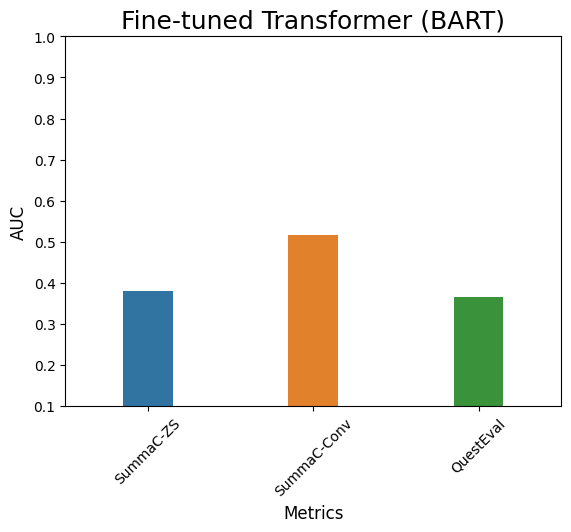

In [232]:
df_error_category_scores = {'AUC': [],  'Metric': []}
summac_zs = get_auc(df_transformer['w/ Error'].values, df_transformer['SummaC-ZS'].values)
summac_conv = get_auc(df_transformer['w/ Error'].values, df_transformer['SummaC-Conv'].values)
questeval = get_auc(df_transformer['w/ Error'].values, df_transformer['QuestEval'].values)
df_error_category_scores['AUC'] += [summac_zs, summac_conv, questeval]
df_error_category_scores['Metric'] += ['SummaC-ZS', 'SummaC-Conv', 'QuestEval']
df_error_category_scores_transformer_overall = pd.DataFrame(df_error_category_scores)

from matplotlib import pyplot as plt
ax = sns.barplot(x="Metric", y="AUC", data=df_error_category_scores_transformer_overall,width = 0.3);

ax.set_xlabel( "Metrics" , size = 12 )
ax.set_ylabel( "AUC" , size = 12 )
  
# Set title for plot
ax.set_title( "Fine-tuned Transformer (BART)" , size = 18 )
# plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
# plt.show()


plt.ylim(0.1, 1.0)
plt.show()



In [251]:
df_error_category_scores = {'AUC': [], 'Error_Category': [], 'Metric': []}
for err_type in error_categories:
    if err_type in df_transformer:
        df_err_type = df_transformer[~df_transformer[err_type].isnull()]
        summac_zs = get_auc(df_err_type[err_type].values, df_err_type['SummaC-ZS'].values)
        summac_conv = get_auc(df_err_type[err_type].values, df_err_type['SummaC-Conv'].values)
        questeval = get_auc(df_err_type[err_type].values, df_err_type['QuestEval'].values)
        df_error_category_scores['AUC'] += [max([summac_zs, summac_conv, questeval])]
        df_error_category_scores['Error_Category'] += [err_type]
        df_error_category_scores['Metric'] += ['Sota']
    else:
        df_error_category_scores['AUC'] += [0]
        df_error_category_scores['Error_Category'] += [err_type]
        df_error_category_scores['Metric'] += ['Sota']
df_error_category_scores_transformer = pd.DataFrame(df_error_category_scores)

/tmp/ipykernel_28722/3933969458.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Error_Category", y="AUC", data=df_error_category_scores_transformer, ci=None);


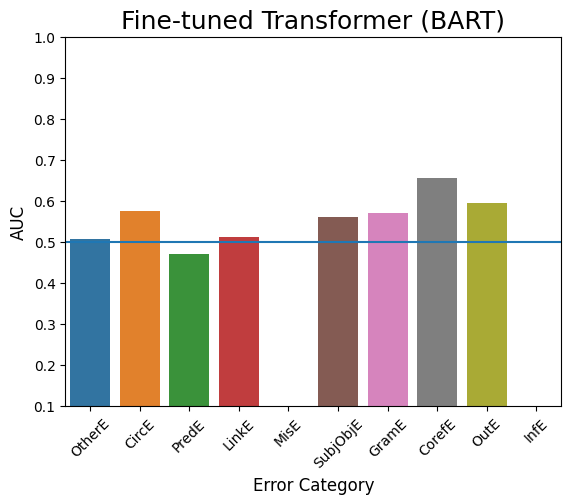

In [257]:
from matplotlib import pyplot as plt
ax = sns.barplot(x="Error_Category", y="AUC", data=df_error_category_scores_transformer, ci=None);

ax.set_xlabel( "Error Category" , size = 12 )
ax.set_ylabel( "AUC" , size = 12 )
  
# Set title for plot
ax.set_title( "Fine-tuned Transformer (BART)" , size = 18 )
# plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
# plt.show()

plt.axhline(y=0.5)
plt.ylim(0.1, 1.0)
plt.show()


In [236]:
error_category = []
for idx, row in df_llm.iterrows():
    error_c = None
    if row['docid'] in list(df_llm_error_categories['docid'].values):
        # print(docid)
        error_c = df_llm_error_categories[df_llm_error_categories['docid'] == row['docid']]['error_category'].values[0]
    error_category += [error_c]
        
df_llm['error_category'] = error_category


In [238]:
df_llm = get_summac_scores(df_llm)
df_llm = get_questeval_scores(df_llm)
df_llm

[Summary 1] SummaCZS Score: 0.426; SummacConv score: 0.223


,Unnamed: 0,uuid,user_id,docid,model,nonfactual_spans,evidence,error_type,summary,dialogue,error_category,SummaC-ZS,SummaC-Conv,QuestEval
48,48,05fc8ddf-284f-4ab7-83fb-b3d9ee737320,sanjana,13682578,gpt4-32k-0613,NaN,NaN,NaN,Frank and Hope express their love for each oth...,Frank: Hey\r\nHope: Hi :)\r\nFrank: I love you...,None,0.425842,0.222796,0.244850
67,67,068b0656-0913-4e41-81a1-4efc1e89fe98,sanjana,13716897,gpt4-32k-0613,NaN,NaN,NaN,The group decides on a location for lunch. Ini...,Linda: hey have we decided on a lunch place ye...,None,-0.119751,0.243426,0.434457
39,39,0cb3ad47-eccd-4ae8-b635-ade086b44598,sanjana,13681560,gpt4-32k-0613,NaN,NaN,NaN,"Hayden is facing a dilemma about his future, p...",Hayden: Anyway I have 1 month to write my thes...,None,0.122995,0.222817,0.395452
13,13,0e251ef7-f3cb-4e14-82c3-565a94703037,sanjana,13680968,gpt4-32k-0613,Boris reminds her to initial the change,Sarah: : Do I need to initial the change?\nBor...,Intrinsic_Error,Sarah''s request for PTO was denied due to man...,Boris: Due to the number of PTO requests this ...,SubjObjE,-0.666393,0.235733,0.390364
47,47,0f5413eb-0c8d-4a2b-8bb8-496a4c12ac22,sanjana,13682408,gpt4-32k-0613,they decide through a card pack which animal t...,Sophie: : you will have to tell me about the f...,Intrinsic_Error,Jenkin and Sophie discuss their respective spi...,Jenkin: hey what is your spirit animal?\r\nSop...,CorefE,-0.191233,0.263861,0.468767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,e5b713fb-3e7e-46c9-bf74-d54b5ad7aa96,sanjana,13611734,gpt4-32k-0613,performance of a soccer player,Not found,Extrinsic_Error,Richie and Clay are discussing the performance...,Richie: Pogba\r\nClay: Pogboom\r\nRichie: what...,OutE,0.556625,0.252432,0.407274
44,44,e8f387ac-0e05-4612-8e67-ad7d3a04e817,sanjana,13682134,gpt4-32k-0613,NaN,NaN,NaN,Javier asked Judie if she knows any tattoo par...,Javier: Hey do you know any tattoo parlors ove...,None,-0.431067,0.209289,0.459586
42,42,ea862550-ea15-4a04-8b7f-d5ac9460b542,sanjana,13681924,gpt4-32k-0613,NaN,NaN,NaN,"Sophia apologizes to Mason, offering a hypothe...",Sophia: I''m sorry\r\nMason: It''s fine\r\nSop...,None,-0.039658,0.265872,0.596448
21,21,ed6911b6-da7a-429c-b42e-a4182e34e276,sanjana,13680757,gpt4-32k-0613,NaN,NaN,NaN,Greg informs Betsy he has to stay late at work...,"Greg: Hi, honey. I need to stay after hours :-...",None,-0.446574,0.223113,0.459927


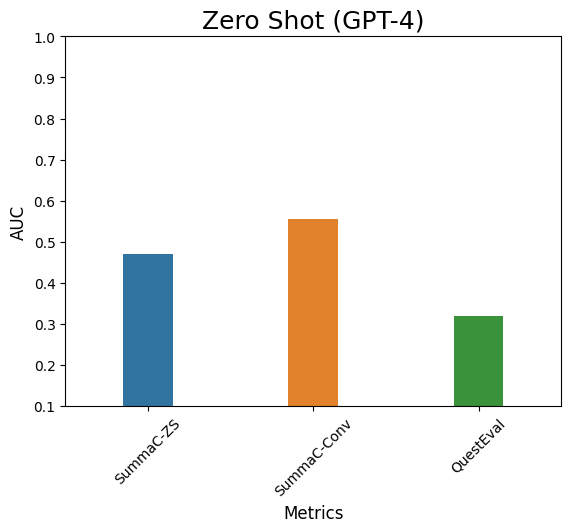

In [240]:
df_error_category_scores = {'AUC': [],  'Metric': []}
y_true = [1 if (type(each) is str) else 0 for each in df_llm['error_type']]
summac_zs = get_auc(y_true, df_llm['SummaC-ZS'].values)
summac_conv = get_auc(y_true, df_llm['SummaC-Conv'].values)
questeval = get_auc(y_true, df_llm['QuestEval'].values)
df_error_category_scores['AUC'] += [summac_zs, summac_conv, questeval]
df_error_category_scores['Metric'] += ['SummaC-ZS', 'SummaC-Conv', 'QuestEval']
df_error_category_scores_df_llm_overall = pd.DataFrame(df_error_category_scores)

from matplotlib import pyplot as plt
ax = sns.barplot(x="Metric", y="AUC", data=df_error_category_scores_df_llm_overall,width = 0.3);

ax.set_xlabel( "Metrics" , size = 12 )
ax.set_ylabel( "AUC" , size = 12 )
  
# Set title for plot
ax.set_title( "Zero Shot (GPT-4)" , size = 18 )
# plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
# plt.show()


plt.ylim(0.1, 1.0)
plt.show()



In [243]:
df_error_category_scores_transformer_overall

,AUC,Metric
0,0.379391,SummaC-ZS
1,0.515469,SummaC-Conv
2,0.365051,QuestEval


In [253]:
df_error_category_scores = {'AUC': [], 'Error_Category': [], 'Metric': []}
for err_type in error_categories:
    if err_type in list(df_llm['error_category'].values):
        # df_err_type = df_llm[df_llm['error_category'] == err_type]
        df_err_type = df_llm
        y_true = [1 if (type(each) is str and each == err_type) else 0 for each in df_err_type['error_category']]
        summac_zs = get_auc(y_true, df_err_type['SummaC-ZS'].values)
        summac_conv = get_auc(y_true, df_err_type['SummaC-Conv'].values)
        questeval = get_auc(y_true, df_err_type['QuestEval'].values)
        #print(df_err_type['error_type'].values)
        df_error_category_scores['AUC'] += [max([summac_zs, summac_conv, questeval])]
        df_error_category_scores['Error_Category'] += [err_type]
        df_error_category_scores['Metric'] += ['Sota']
    else:
        df_error_category_scores['AUC'] += [0]
        df_error_category_scores['Error_Category'] += [err_type]
        df_error_category_scores['Metric'] += ['Sota']
df_error_category_scores = pd.DataFrame(df_error_category_scores)

In [254]:
df_error_category_scores

,AUC,Error_Category,Metric
0,0.000000,OtherE,Sota
1,0.642857,CircE,Sota
2,0.656250,PredE,Sota
3,0.750000,LinkE,Sota
4,0.765625,MisE,Sota
5,0.543011,SubjObjE,Sota
6,0.000000,GramE,Sota
7,0.595238,CorefE,Sota
8,0.553763,OutE,Sota
9,0.531250,InfE,Sota


/tmp/ipykernel_28722/3582857389.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Error_Category", y="AUC", data=df_error_category_scores, ci=None);


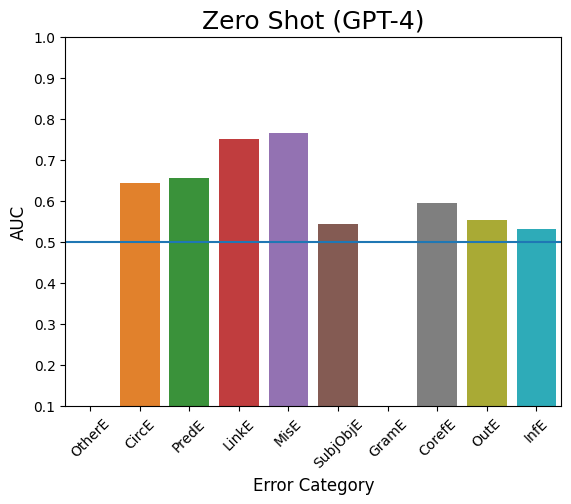

In [256]:
from matplotlib import pyplot as plt
ax = sns.barplot(x="Error_Category", y="AUC", data=df_error_category_scores, ci=None);
ax.set_xlabel( "Error Category" , size = 12 )
ax.set_ylabel( "AUC" , size = 12 )
  
# Set title for plot
ax.set_title( "Zero Shot (GPT-4)" , size = 18 )
# plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
# plt.show()


plt.ylim(0.1, 1.0)
plt.axhline(y=0.5)
plt.show()
# plt.ylim(0.1, 1.0)
# plt.show()